In [1]:
from LOCA2.LOCA2_predagster import OpenLocaCat
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

When running LOCA2_predagster, I need to initialize the class OpenLocaCat first, which initializes the catalog.

In [2]:
OpenLocaCat = OpenLocaCat()

Initialized
<loca2_zarr_monthly_esm_catalog catalog with 2313 dataset(s) from 2313 asset(s)>


In [3]:
OpenLocaCat.catalog

,unique
variable,3
model,27
scheme,4
experiment_id,14
time_range,4
path,2313


# Catalog

### Variables

The variables are the different climate and weather variables.

tasmax - Maximum temperature \
tasmin - Minimum temperature \
pr - Precipitation

In [9]:
OpenLocaCat.catalog.df.variable.unique()

array(['tasmax', 'tasmin', 'pr'], dtype=object)

### Models

The models are the different general circulation models (GCMs) that went into LOCA2. 

For instance, CanESM5 is Canada's Earth System Model, HadGEM3-GC31-MM is the UK Met Center's model, and 
BCC-CSM2-MR comes from Beijing.

There's 27 in LOCA2 in total, but not all of them have every variable, experiment id, or scheme.

In [8]:
OpenLocaCat.catalog.df.model.unique()

array(['EC-Earth3-Veg', 'FGOALS-g3', 'IPSL-CM6A-LR', 'KACE-1-0-G',
       'CanESM5', 'INM-CM4-8', 'CESM2-LENS', 'HadGEM3-GC31-LL',
       'MPI-ESM1-2-LR', 'HadGEM3-GC31-MM', 'NorESM2-LM', 'CNRM-CM6-1-HR',
       'ACCESS-CM2', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'GFDL-ESM4',
       'ACCESS-ESM1-5', 'GFDL-CM4', 'AWI-CM-1-1-MR', 'MIROC6',
       'EC-Earth3', 'INM-CM5-0', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'TaiESM1',
       'NorESM2-MM', 'CNRM-ESM2-1'], dtype=object)

### Schemes

The schemes represent the different scenarios used to project climate conditions in the future in the [ScenarioMIP](https://gmd.copernicus.org/articles/9/3461/2016/). The Shared Socioeconomic Pathways (SSPs) represent different possible futures as certain countries may grow and others may mitigate emissions.

historical - Climate model's representation of climate over 1850-2014. \
ssp245 - Climate under moderate CO2 emissions over the future from 2015-2100. \
ssp370 - Climate under enhanced CO2 emissions over 2015-2100. \
ssp585 - Climate under very enhanced CO2 emissions over 2015-2100. 

In [10]:
OpenLocaCat.catalog.df.scheme.unique()

array(['historical', 'ssp245', 'ssp585', 'ssp370'], dtype=object)

### Experiment IDs

Experiment IDs represent the specific simulation's ID. The letters and numbers represent different things:

r# - Realization - Represents different simulations \
i# - Initialization - Represents different initialization methods \
p# - Physics - Represents different physics variants \
f# - Forcing - Represents different forcing variants 

Two datasets with Experiment IDs r1i1p1f1 and r2i1p1f1 means that their simulations were run with the exact same conditions except with very slightly different initial conditions, so as to  introduce some variability into their datasets. They are comparable to each other.

In [11]:
OpenLocaCat.catalog.df.experiment_id.unique()

array(['r4i1p1f1', 'r3i1p1f1', 'r2i1p1f1', 'r7i1p1f1', 'r1i1p1f1',
       'r10i1p1f1', 'r9i1p1f1', 'r1i1p1f3', 'r5i1p1f1', 'r1i1p1f2',
       'r8i1p1f1', 'r6i1p1f1', 'r3i1p1f3', 'r2i1p1f3'], dtype=object)

### Time ranges

These represent the different time ranges.

The SSPs are split up in thirds: 2015-2044, 2045-2074, and 2075-2100

OpenLocaCat handles merging the split up datasets by itself.

In [12]:
OpenLocaCat.catalog.df.time_range.unique()

array(['1950-2014', '2075-2100', '2015-2044', '2045-2074'], dtype=object)

# Calling a Dataset

I call a dataset using OpenLocaCat.load(query), where query is a dictionary.

You can choose to call on any of the above rows from the catalog. If you choose not to call a row, load automatically loads all of that row. For instance, if I don't call model, all models will be called.

Also note, calling historical with any of the other schemes will result in errors due to their incongruent time ranges (I may fix this in the future if usage necessitates so).

In [6]:
query = dict(variable=['tasmax'],
             scheme=['ssp245','ssp370'],
             experiment_id=['r1i1p1f1'])

OpenLocaCat.load(query)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.model.scheme.experiment_id.time_range.path'


Empty!
Empty!


/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/LOCA2/LOCA2_predagster.py:132: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  datetimeindex = dataset_full.indexes['time'].to_datetimeindex()


<xarray.Dataset> Size: 325GB
Dimensions:      (member_id: 1, model: 22, scheme: 2, time: 2064, lat: 474,
                  lon: 944)
Coordinates:
  * lat          (lat) float32 2kB 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * lon          (lon) float32 4kB 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * time         (time) datetime64[ns] 17kB 2015-01-16 ... 2100-12-16T12:00:00
  * scheme       (scheme) <U6 48B 'ssp370' 'ssp245'
  * member_id    (member_id) <U8 32B 'r1i1p1f1'
  * model        (model) <U13 1kB 'INM-CM4-8' ... 'MPI-ESM1-2-HR'
Data variables:
    tasmax_tavg  (member_id, model, scheme, time, lat, lon) float64 325GB dask.array<chunksize=(1, 1, 1, 36, 60, 236), meta=np.ndarray>

If "Empty!" shows up, don't worry. It just means that not all possible permutations of the conditions in the query exist, so nothing is returned 
for those datasets in particular. 

For instance, if you try to call 'BCC-CSM2-MR' with 'r10i1p1f1' and 'tasmax', a dataset with all three of those conditions might not exist,
so "Empty!" might get printed.

# Working Example

For the example here, I call:

- The variables tasmax (Maximum temperature) and pr (precipitation)
- The model ACCESS-CM2
- The scheme ssp370
- and the experiment IDs r1i1p1f1 and r2i1p1f1

In [7]:
query = dict(variable=['tasmax','pr'],
             model=['ACCESS-CM2'],
             scheme=["ssp370"],
             experiment_id=['r1i1p1f1','r2i1p1f1'])

test_dataset = OpenLocaCat.load(query)
test_dataset


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.model.scheme.experiment_id.time_range.path'


/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/LOCA2/LOCA2_predagster.py:132: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  datetimeindex = dataset_full.indexes['time'].to_datetimeindex()


<xarray.Dataset> Size: 7GB
Dimensions:      (member_id: 2, model: 1, scheme: 1, time: 1032, lat: 474,
                  lon: 944)
Coordinates:
  * lat          (lat) float32 2kB 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * lon          (lon) float32 4kB 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * time         (time) datetime64[ns] 8kB 2015-01-16T12:00:00 ... 2100-12-16...
  * member_id    (member_id) <U8 64B 'r2i1p1f1' 'r1i1p1f1'
  * scheme       (scheme) <U6 24B 'ssp370'
  * model        (model) <U10 40B 'ACCESS-CM2'
Data variables:
    tasmax_tavg  (member_id, model, scheme, time, lat, lon) float32 4GB dask.array<chunksize=(1, 1, 1, 45, 60, 236), meta=np.ndarray>
    pr_tavg      (member_id, model, scheme, time, lat, lon) float32 4GB dask.array<chunksize=(1, 1, 1, 45, 60, 236), meta=np.ndarray>

Experiment_id becomes member_id here.

Here's what the first timestep of the r1i1p1f1 model looks like, with tasmax on the left and pr on the right.

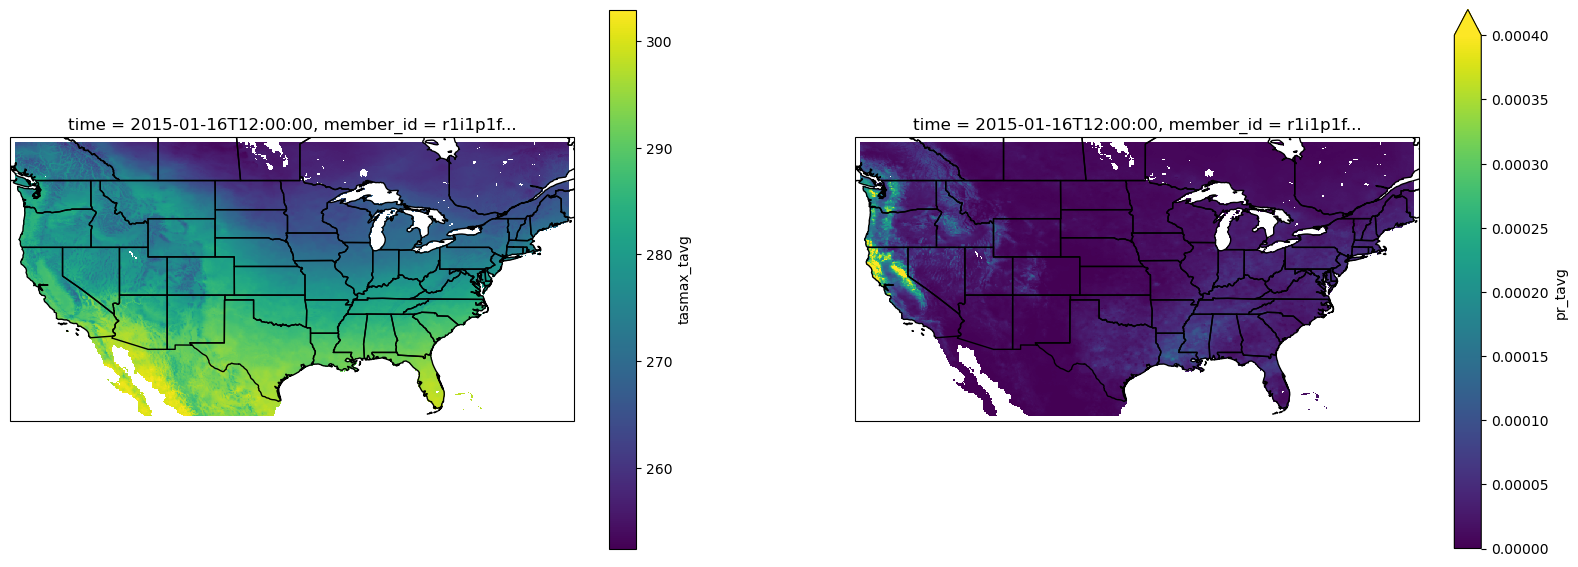

In [13]:
plt.rcParams['figure.figsize'] = [20,7]
fig, [ax1,ax2] = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})

test_dataset.tasmax_tavg.isel(time=0).sel(member_id='r1i1p1f1').plot(ax=ax1, 
                                                                    transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)

test_dataset.pr_tavg.isel(time=0).sel(member_id='r1i1p1f1').plot(ax=ax2,
                                                                 vmin=0,
                                                                 vmax=0.0004,
                                                                    transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)

# OpenLocaCat methods

### OpenLocaCat.means

This method calculates means across the models in the order given. In the below example, it takes means across

- time
- member_id
- and model

in order. When taking means, you always want to do member_id first, then model due to how each simulation gets weighted.

In [8]:
help(OpenLocaCat.means)

Help on method means in module LOCA2.LOCA2_predagster:

means(dataset, coords) method of LOCA2.LOCA2_predagster.OpenLocaCat instance
    Calculates means across the models for all variables

    (May add standard deviation and variance)

    Input:
        - dataset (Dataset or Dataarray) - An xarray dataset to have means done across each variable
        - coords (List of strings) - Takes mean across each dim. given in order of the list

    Output:
        - data_stats (Dataset) - Contains means across designated coords of the dataset



In [4]:
test_dataset_stats = OpenLocaCat.means(test_dataset.sel(time=slice('2020-01-16','2025-01-16')),['time','member_id','model'])
test_dataset_stats

<xarray.Dataset> Size: 4MB
Dimensions:      (scheme: 1, lat: 474, lon: 944)
Coordinates:
  * lat          (lat) float32 2kB 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * lon          (lon) float32 4kB 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * scheme       (scheme) <U6 24B 'ssp370'
Data variables:
    tasmax_tavg  (scheme, lat, lon) float32 2MB dask.array<chunksize=(1, 60, 236), meta=np.ndarray>
    pr_tavg      (scheme, lat, lon) float32 2MB dask.array<chunksize=(1, 60, 236), meta=np.ndarray>

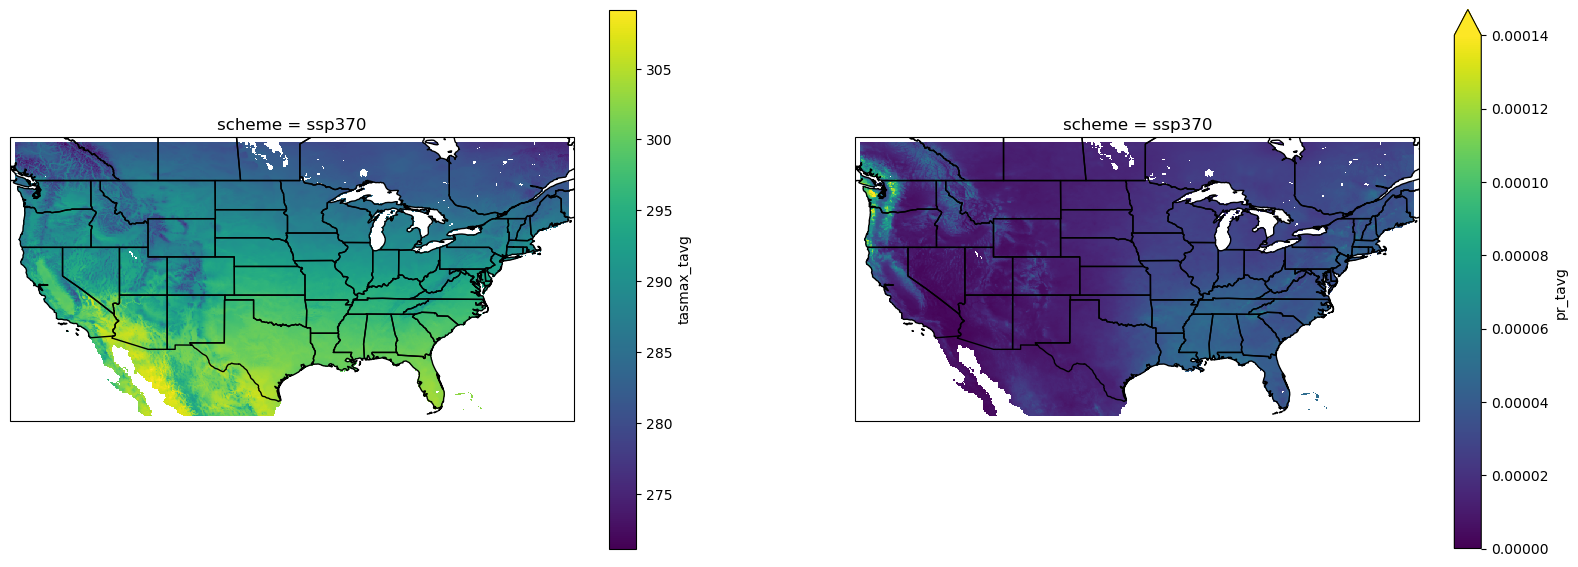

In [20]:
plt.rcParams['figure.figsize'] = [20,7]
fig, [ax1,ax2] = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})

test_dataset_stats.tasmax_tavg.plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)

test_dataset_stats.pr_tavg.plot(ax=ax2, vmin=0, vmax=0.00014, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)

### OpenLocaCat.illinois

This crops the dataset to just Illinois.

In [9]:
help(OpenLocaCat.illinois)

Help on method illinois in module LOCA2.LOCA2_predagster:

illinois(dataset) method of LOCA2.LOCA2_predagster.OpenLocaCat instance
    Returns the dataset to the area surrounding Illinois



In [9]:
test_dataset_ill = OpenLocaCat.illinois(test_dataset_stats)
test_dataset_ill

<xarray.Dataset> Size: 106kB
Dimensions:      (scheme: 1, lat: 120, lon: 109)
Coordinates:
  * lat          (lat) float32 480B 36.03 36.09 36.16 ... 43.34 43.41 43.47
  * lon          (lon) float32 436B 267.2 267.3 267.3 ... 273.8 273.9 274.0
  * scheme       (scheme) <U6 24B 'ssp370'
Data variables:
    tasmax_tavg  (scheme, lat, lon) float32 52kB dask.array<chunksize=(1, 46, 109), meta=np.ndarray>
    pr_tavg      (scheme, lat, lon) float32 52kB dask.array<chunksize=(1, 46, 109), meta=np.ndarray>

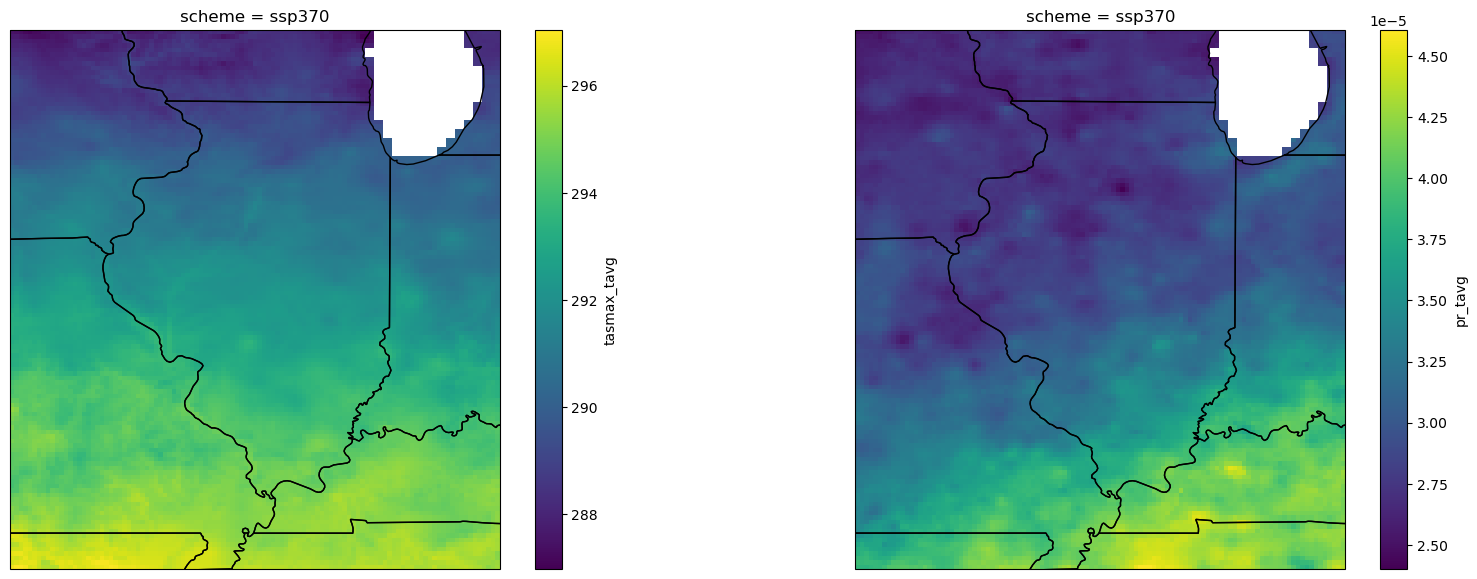

In [21]:
plt.rcParams['figure.figsize'] = [20,7]
fig, [ax1, ax2] = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})

test_dataset_ill.tasmax_tavg.plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.STATES)

test_dataset_ill.pr_tavg.plot(ax=ax2, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)

# OpenLocaCat.parquet

This saves the dataset to a GeoParquet. Each gridbox is saved to a geometry point (This may be changed to gridboxes in the future).

In [10]:
help(OpenLocaCat.parquet)

Help on method parquet in module LOCA2.LOCA2_predagster:

parquet(dataset, filename) method of LOCA2.LOCA2_predagster.OpenLocaCat instance
    Sends dataset to a GeoParquet file

    Input:
        - dataset (Dataset) - An xarray dataset with a lat and a lon coordinate
        - filename (string) - File to save GeoParquet to

    No output, but saves a file at filename



In [22]:
OpenLocaCat.parquet(test_dataset_ill, 'test_parquet.geoparquet')

In [25]:
gpd.read_parquet('test_parquet.geoparquet')

,scheme,tasmax_tavg,pr_tavg,geometry
0,ssp370,296.828857,0.000039,POINT (267.21875 36.03125)
1,ssp370,297.040344,0.000038,POINT (267.28125 36.03125)
2,ssp370,296.998962,0.000038,POINT (267.34375 36.03125)
3,ssp370,296.853516,0.000038,POINT (267.40625 36.03125)
4,ssp370,296.421265,0.000039,POINT (267.46875 36.03125)
...,...,...,...,...
13075,ssp370,288.285583,0.000029,POINT (273.71875 43.46875)
13076,ssp370,288.355835,0.000029,POINT (273.78125 43.46875)
13077,ssp370,288.340210,0.000029,POINT (273.84375 43.46875)
13078,ssp370,288.311035,0.000029,POINT (273.90625 43.46875)
